In [2]:
import os
import json
import polars as pl
import polars.selectors as cs
from pathlib import Path
import pandas as pd

## Turn File into .parquet

In [4]:
INPUT_DIR = "data/raw_youtube_comments"
OUTPUT_FILE = "all_comments.parquet"

In [5]:
def flatten_json(d, parent_key="", sep="_"):
    """Recursively flattens a nested JSON object into a dict with prefixed keys."""
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_json(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [ ]:
# # Let's say you have multiple JSON files in a folder
# data_folder = Path("data/raw_youtube_comments_relevance")
# rows = []

# for file in data_folder.glob("*.json"):
#     with open(file, "r", encoding="utf-8") as f:
#         raw = json.load(f)
#         for entry in raw.get("items", []):  # your "response" field
#             rows.append(flatten_json(entry))

# # Create Polars DataFrame
# df = pl.DataFrame(rows)

# # Save to parquet
# df.write_parquet("comments.parquet")

## Data by relevance

In [3]:
df = pl.read_parquet("data/clean/relevance/comments.parquet")
df.head()

kind,etag,id,snippet_channelId,snippet_videoId,snippet_topLevelComment_kind,snippet_topLevelComment_etag,snippet_topLevelComment_id,snippet_topLevelComment_snippet_channelId,snippet_topLevelComment_snippet_videoId,snippet_topLevelComment_snippet_textDisplay,snippet_topLevelComment_snippet_textOriginal,snippet_topLevelComment_snippet_authorDisplayName,snippet_topLevelComment_snippet_authorProfileImageUrl,snippet_topLevelComment_snippet_authorChannelUrl,snippet_topLevelComment_snippet_authorChannelId_value,snippet_topLevelComment_snippet_canRate,snippet_topLevelComment_snippet_viewerRating,snippet_topLevelComment_snippet_likeCount,snippet_topLevelComment_snippet_publishedAt,snippet_topLevelComment_snippet_updatedAt,snippet_canReply,snippet_totalReplyCount,snippet_isPublic,replies_comments
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,str,i64,str,str,bool,i64,bool,list[struct[4]]
"""youtube#commentThread""","""5X4c9JpM8u0seA5iAaQ8P9Z30UE""","""Ugx_LrD9EQxPmvmHmNB4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""OFySluPd6L6HxyxATAhAZLZIu88""","""Ugx_LrD9EQxPmvmHmNB4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""Virgo""","""Virgo""","""@BilalRazzaq-r4p""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@BilalR…","""UCbyVaZZErCfW8kV0vPUMUqQ""",true,"""none""",0,"""2025-10-02T10:12:32Z""","""2025-10-02T10:12:32Z""",true,0,true,null
"""youtube#commentThread""","""03_v_OV1dSXBxKOHHVoh9ddg5VY""","""UgwL0V8QLNB_bmXMEYx4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""BOyJO_vmuZ5Y20upJQHQVXlNi6Y""","""UgwL0V8QLNB_bmXMEYx4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""Azgona""","""Azgona""","""@lindaselimi1723""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@lindas…","""UCBwnn2MNaIW1rWr1J5XMoRg""",true,"""none""",0,"""2025-09-26T12:05:50Z""","""2025-09-26T12:05:50Z""",true,0,true,null
"""youtube#commentThread""","""zijVJD5RGsUJFjt_v-8uXlf2e2E""","""Ugx9WwEYettdsDcZ7MV4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""s8On9I5xCwCWXhDdqBPBl2kELoY""","""Ugx9WwEYettdsDcZ7MV4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""Justin <a href=""https://www.yo…","""Justin 2:31 hoy no puedo tengo…","""@JuliethandreaAsprilla""","""https://yt3.ggpht.com/_gSgbkBK…","""http://www.youtube.com/@Juliet…","""UC7_7zuBcOWGw4NzkWynlbXg""",true,"""none""",0,"""2025-09-26T15:38:02Z""","""2025-09-26T15:38:02Z""",true,0,true,null
"""youtube#commentThread""","""12t3pbgH0bzDzU7UMs7NfLeNhdA""","""UgzWEHA_DyX6lhxXGRt4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""_hw2ZYC0sL_4Bl5YcO5psTFeOEU""","""UgzWEHA_DyX6lhxXGRt4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""Is this before he got diddled?""","""Is this before he got diddled?""","""@Dr3w_4_u""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@Dr3w_4…","""UCJ49JtaIp3vCVjKl1QtfSXg""",true,"""none""",0,"""2025-09-29T23:22:35Z""","""2025-09-29T23:22:35Z""",true,0,true,null
"""youtube#commentThread""","""2Bs4BWOg2QNNGKEDsZkWlTAtl6Q""","""UgzeBP3fOh430MO3Ohx4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""uSqWR9fQEzeZkvrq9Ulqyd_I4fU""","""UgzeBP3fOh430MO3Ohx4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""ロジック😮""","""ロジック😮""","""@user-zd8wp8bl3v""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@user-z…","""UC6vJc-nIXA7NXzQbIftId_g""",true,"""none""",0,"""2025-09-27T19:18:18Z""","""2025-09-27T19:18:18Z""",true,0,true,null


In [4]:
df.shape

(1086, 25)

## Data by Chronological Order

In [5]:
df = pl.read_parquet("data/clean/chronological/comments.parquet")
df.head()

kind,etag,id,snippet_channelId,snippet_videoId,snippet_topLevelComment_kind,snippet_topLevelComment_etag,snippet_topLevelComment_id,snippet_topLevelComment_snippet_channelId,snippet_topLevelComment_snippet_videoId,snippet_topLevelComment_snippet_textDisplay,snippet_topLevelComment_snippet_textOriginal,snippet_topLevelComment_snippet_authorDisplayName,snippet_topLevelComment_snippet_authorProfileImageUrl,snippet_topLevelComment_snippet_authorChannelUrl,snippet_topLevelComment_snippet_authorChannelId_value,snippet_topLevelComment_snippet_canRate,snippet_topLevelComment_snippet_viewerRating,snippet_topLevelComment_snippet_likeCount,snippet_topLevelComment_snippet_publishedAt,snippet_topLevelComment_snippet_updatedAt,snippet_canReply,snippet_totalReplyCount,snippet_isPublic,replies_comments
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,str,i64,str,str,bool,i64,bool,list[struct[4]]
"""youtube#commentThread""","""uQA-qS9CXMbmpJnBFzzYVKNAsvM""","""UgxJOtvRgP-TK-DDSbh4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""ftCX1u_cMcFYWvy1sForf9HYYlo""","""UgxJOtvRgP-TK-DDSbh4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""Good reason holy grain""","""Good reason holy grain""","""@nishapatel-m8r""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@nishap…","""UC1pcc2njrSbt9Dxvv7jCZcQ""",true,"""none""",1,"""2025-09-24T17:11:11Z""","""2025-09-24T17:11:11Z""",true,0,true,null
"""youtube#commentThread""","""4hudTL3Z5iN4pgKkkQbIulOJ5EM""","""UgxtC2RpNWCNRupMHvl4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""rTwa0LUA1izDUGc0PKXTIu-GiJg""","""UgxtC2RpNWCNRupMHvl4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""anyone in 2025 ....... lets ga…","""anyone in 2025 ....... lets ga…","""@moloantoa8655""","""https://yt3.ggpht.com/sCWKiUE8…","""http://www.youtube.com/@moloan…","""UCHLFXF2C8LdrjPhH3Vi4dyA""",true,"""none""",56,"""2025-09-24T16:47:44Z""","""2025-09-24T16:47:44Z""",true,8,true,"[{""youtube#comment"",""aaOFfL5gP8hlrICa-lZ1PtGajTc"",""UgxtC2RpNWCNRupMHvl4AaABAg.ANT03nbSg30ANTQ5hnoIcR"",{""UCHkj014U2CQ2Nv0UZeYpE_A"",""kffacxfA7G4"",""hehe"",""hehe"",""UgxtC2RpNWCNRupMHvl4AaABAg"",""@Toliii_"",""https://yt3.ggpht.com/zOobxWViS3ZZQ4T5dmDK3bkleUQZGHV4sPgxanVnhUeqtcmYMBVXtIlzRVNRR_3Sqqu-Px0IRc4=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@Toliii_"",{""UCmiE9AN4VP-mbZLe4YZIUeA""},true,""none"",2,""2025-09-24T20:35:12Z"",""2025-09-24T20:35:12Z""}}, {""youtube#comment"",""RApwV-DBVk3KyXkgj5WdBT7wVg8"",""UgxtC2RpNWCNRupMHvl4AaABAg.ANT03nbSg30ANTc5AYS6rZ"",{""UCHkj014U2CQ2Nv0UZeYpE_A"",""kffacxfA7G4"",""Here bro, just for nostalgia"",""Here bro, just for nostalgia"",""UgxtC2RpNWCNRupMHvl4AaABAg"",""@AssSlayer-v4q"",""https://yt3.ggpht.com/fJvVUbGK5uNPv-jG7cX4v0N_-VNNUFzOSqeMOBPuAgqtqY30T9Pj2DaYq3-tCJIsemU5_BeC-w=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@AssSlayer-v4q"",{""UCBELkmM6LYQ02rNyibcTrTA""},true,""none"",0,""2025-09-24T22:28:43Z"",""2025-09-24T22:28:43Z""}}, … {""youtube#comment"",""z2aiV_-BciedbhIBylMPA4XAMaY"",""UgxtC2RpNWCNRupMHvl4AaABAg.ANT03nbSg30ANWq7skb7fa"",{""UCHkj014U2CQ2Nv0UZeYpE_A"",""kffacxfA7G4"",""Hey"",""Hey"",""UgxtC2RpNWCNRupMHvl4AaABAg"",""@Eliotxpresso"",""https://yt3.ggpht.com/cXSFxB5g6oLy2imLdKik8qZ6UpUFVKiXus1JCoE8wxja8tWVEl0Q6Dn6qUTSd9cruBPYBS0U=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@Eliotxpresso"",{""UC3v-Xu6dpdHX0kZva3NnJXA""},true,""none"",1,""2025-09-26T04:29:08Z"",""2025-09-26T04:29:08Z""}}]"
"""youtube#commentThread""","""Mh2HvwFyqTHuY3lmXdtWdqTXbSs""","""UgxKAugIlYmsTGIUgxt4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""VUb_AWjx-fRjqJH9VA1DiG7tWhc""","""UgxKAugIlYmsTGIUgxt4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""After so many years people r s…","""After so many years people r s…","""@Meckzy_on60fps""","""https://yt3.ggpht.com/7OthEhNG…","""http://www.youtube.com/@Meckzy…","""UCfdxsCfK0qJG

## Exploración y Limpieza de Base de Datos

In [6]:
df.shape

(2000, 25)

In [7]:
num_cols = df.select(pl.col(pl.NUMERIC_DTYPES)).columns

# Estadísticas básicas por columna numérica
num_stats = df.select([
    pl.col(col).mean().alias(f"{col}_mean") for col in num_cols
] + [
    pl.col(col).median().alias(f"{col}_median") for col in num_cols
] + [
    pl.col(col).std().alias(f"{col}_std") for col in num_cols
] + [
    pl.col(col).min().alias(f"{col}_min") for col in num_cols
] + [
    pl.col(col).max().alias(f"{col}_max") for col in num_cols
])

print(num_stats)


shape: (1, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ snippet_t ┆ snippet_t ┆ snippet_t ┆ snippet_t ┆ … ┆ snippet_t ┆ snippet_t ┆ snippet_t ┆ snippet_ │
│ opLevelCo ┆ otalReply ┆ opLevelCo ┆ otalReply ┆   ┆ opLevelCo ┆ otalReply ┆ opLevelCo ┆ totalRep │
│ mment_sni ┆ Count_mea ┆ mment_sni ┆ Count_med ┆   ┆ mment_sni ┆ Count_min ┆ mment_sni ┆ lyCount_ │
│ ppe…      ┆ n         ┆ ppe…      ┆ ian       ┆   ┆ ppe…      ┆ ---       ┆ ppe…      ┆ max      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ i64       ┆ ---       ┆ ---      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ i64       ┆           ┆ i64       ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2.2325    ┆ 0.2455    ┆ 0.0       ┆ 0.0       ┆ … ┆ 0         ┆ 0         ┆ 836       ┆ 106      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────

C:\Users\Sharis Barrios\AppData\Local\Temp\ipykernel_26816\2184062423.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  num_cols = df.select(pl.col(pl.NUMERIC_DTYPES)).columns


In [8]:
# Lectura de Datos en Pandas
df = pd.read_parquet("data/clean/chronological/comments.parquet", engine="fastparquet")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
df.head()

,kind,etag,id,snippet_channelId,snippet_videoId,snippet_topLevelComment_kind,snippet_topLevelComment_etag,snippet_topLevelComment_id,snippet_topLevelComment_snippet_channelId,snippet_topLevelComment_snippet_videoId,...,snippet_topLevelComment_snippet_authorChannelId_value,snippet_topLevelComment_snippet_canRate,snippet_topLevelComment_snippet_viewerRating,snippet_topLevelComment_snippet_likeCount,snippet_topLevelComment_snippet_publishedAt,snippet_topLevelComment_snippet_updatedAt,snippet_canReply,snippet_totalReplyCount,snippet_isPublic,replies_comments
0,youtube#commentThread,uQA-qS9CXMbmpJnBFzzYVKNAsvM,UgxJOtvRgP-TK-DDSbh4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,youtube#comment,ftCX1u_cMcFYWvy1sForf9HYYlo,UgxJOtvRgP-TK-DDSbh4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,...,UC1pcc2njrSbt9Dxvv7jCZcQ,True,none,1,2025-09-24T17:11:11Z,2025-09-24T17:11:11Z,True,0,True,None
1,youtube#commentThread,4hudTL3Z5iN4pgKkkQbIulOJ5EM,UgxtC2RpNWCNRupMHvl4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,youtube#comment,rTwa0LUA1izDUGc0PKXTIu-GiJg,UgxtC2RpNWCNRupMHvl4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,...,UCHLFXF2C8LdrjPhH3Vi4dyA,True,none,56,2025-09-24T16:47:44Z,2025-09-24T16:47:44Z,True,8,True,None
2,youtube#commentThread,Mh2HvwFyqTHuY3lmXdtWdqTXbSs,UgxKAugIlYmsTGIUgxt4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,youtube#comment,VUb_AWjx-fRjqJH9VA1DiG7tWhc,UgxKAugIlYmsTGIUgxt4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,...,UCfdxsCfK0qJGZBc-GBOX1UA,True,none,1,2025-09-24T16:37:23Z,2025-09-24T16:37:23Z,True,0,True,None
3,youtube#commentThread,zWwNW4kE0lNRZOOqWWdZLfhx_4o,UgyTyY11iDQ0--9qH_54AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,youtube#comment,DpsifoeTtomPgd94ik0z42wxOUo,UgyTyY11iDQ0--9qH_54AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,...,UCdGwvLMmAb0WeybPerBJaZw,True,none,255,2025-09-24T16:36:24Z,2025-09-24T16:36:24Z,True,8,True,None
4,youtube#commentThread,U7baMib9pe2lkg_Ls0Ylnzu6KoY,UgwujpmaPaL9W-RnFjN4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,youtube#comment,fgzPU6soxIbzkyDzNcU7S6H1sKU,UgwujpmaPaL9W-RnFjN4AaABAg,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,...,UC3PwcVCdUGjmfELhGU7ZiPg,True,none,0,2025-09-24T16:27:29Z,2025-09-24T16:27:29Z,True,0,True,None


In [ ]:
# Visualización de un solo registro
print(df.iloc[654])

kind                                                                                 youtube#commentThread
etag                                                                           oFaqW-1meM_XA4dAhBktyX0TI-U
id                                                                              UgyFNuP_hArQcEcGTZ94AaABAg
snippet_channelId                                                                 UCHkj014U2CQ2Nv0UZeYpE_A
snippet_videoId                                                                                kffacxfA7G4
snippet_topLevelComment_kind                                                               youtube#comment
snippet_topLevelComment_etag                                                   NmUrMgXo86W8Qu25Xtm5vtb3jF0
snippet_topLevelComment_id                                                      UgyFNuP_hArQcEcGTZ94AaABAg
snippet_topLevelComment_snippet_channelId                                         UCHkj014U2CQ2Nv0UZeYpE_A
snippet_topLevelComment_snippet_video

In [12]:
# Eliminación de columnas inncesarias y limpieza de nombres y datos para el procesamiento
df = df.iloc[:, 8:]

df.columns = df.columns.str.replace('^snippet_topLevelComment_snippet_', '', regex=True)
df.columns = df.columns.str.replace('^snippet_', '', regex=True)
df.insert(0, 'ID', range(1, len(df) + 1))

# Verificación
df.head()

,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic,replies_comments
0,1,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,Good reason holy grain,Good reason holy grain,@nishapatel-m8r,https://yt3.ggpht.com/ytc/AIdro_m4jHpdqKmH8-tQ...,http://www.youtube.com/@nishapatel-m8r,UC1pcc2njrSbt9Dxvv7jCZcQ,True,none,1,2025-09-24T17:11:11Z,2025-09-24T17:11:11Z,True,0,True,None
1,2,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,anyone in 2025 ....... lets gather here😉😉😉👇👇,anyone in 2025 ....... lets gather here😉😉😉👇👇,@moloantoa8655,https://yt3.ggpht.com/sCWKiUE8-qdaI7CkWEugE0eD...,http://www.youtube.com/@moloantoa8655,UCHLFXF2C8LdrjPhH3Vi4dyA,True,none,56,2025-09-24T16:47:44Z,2025-09-24T16:47:44Z,True,8,True,None
2,3,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,After so many years people r still commenting,After so many years people r still commenting,@Meckzy_on60fps,https://yt3.ggpht.com/7OthEhNGANU3OqpucpBUryzy...,http://www.youtube.com/@Meckzy_on60fps,UCfdxsCfK0qJGZBc-GBOX1UA,True,none,1,2025-09-24T16:37:23Z,2025-09-24T16:37:23Z,True,0,True,None
3,4,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,You&#39;re a legend if you&#39;re listenin to ...,You're a legend if you're listenin to this 15 ...,@MyFlower_PARKJimin,https://yt3.ggpht.com/-yfnrXAJZPYeEpBB_2iUyXz3...,http://www.youtube.com/@MyFlower_PARKJimin,UCdGwvLMmAb0WeybPerBJaZw,True,none,255,2025-09-24T16:36:24Z,2025-09-24T16:36:24Z,True,8,True,None
4,5,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,2050 anyone?,2050 anyone?,@tuyamarino,https://yt3.ggpht.com/ytc/AIdro_k7hhBc7e1YOi1N...,http://www.youtube.com/@tuyamarino,UC3PwcVCdUGjmfELhGU7ZiPg,True,none,0,2025-09-24T16:27:29Z,2025-09-24T16:27:29Z,True,0,True,None


In [13]:
# Limpieza dento de los datos

# Remplazo de valores a numéricos
df = df.replace({True: 1, False: 0, 'True': 1, 'False': 0})

# Eliminación de caracteres 
df['authorChannelUrl'] = df['authorChannelUrl'].str.replace('^http://www.youtube.com/', '', regex=True)

# Fechas y Zona horaria
# Convertir las columnas a tipo datetime (formato ISO 8601)
df['publishedAt'] = pd.to_datetime(df['publishedAt'], utc=True)
df['updatedAt'] = pd.to_datetime(df['updatedAt'], utc=True)

# Asignar zona horaria de Guatemala (UTC-6)
df['publishedAt'] = df['publishedAt'].dt.tz_convert('America/Guatemala')
df['updatedAt'] = df['updatedAt'].dt.tz_convert('America/Guatemala')


df.head()

C:\Users\Sharis Barrios\AppData\Local\Temp\ipykernel_26816\3479434220.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0, 'True': 1, 'False': 0})


,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic,replies_comments
0,1,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,Good reason holy grain,Good reason holy grain,@nishapatel-m8r,https://yt3.ggpht.com/ytc/AIdro_m4jHpdqKmH8-tQ...,@nishapatel-m8r,UC1pcc2njrSbt9Dxvv7jCZcQ,1,none,1,2025-09-24 11:11:11-06:00,2025-09-24 11:11:11-06:00,1,0,1,None
1,2,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,anyone in 2025 ....... lets gather here😉😉😉👇👇,anyone in 2025 ....... lets gather here😉😉😉👇👇,@moloantoa8655,https://yt3.ggpht.com/sCWKiUE8-qdaI7CkWEugE0eD...,@moloantoa8655,UCHLFXF2C8LdrjPhH3Vi4dyA,1,none,56,2025-09-24 10:47:44-06:00,2025-09-24 10:47:44-06:00,1,8,1,None
2,3,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,After so many years people r still commenting,After so many years people r still commenting,@Meckzy_on60fps,https://yt3.ggpht.com/7OthEhNGANU3OqpucpBUryzy...,@Meckzy_on60fps,UCfdxsCfK0qJGZBc-GBOX1UA,1,none,1,2025-09-24 10:37:23-06:00,2025-09-24 10:37:23-06:00,1,0,1,None
3,4,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,You&#39;re a legend if you&#39;re listenin to ...,You're a legend if you're listenin to this 15 ...,@MyFlower_PARKJimin,https://yt3.ggpht.com/-yfnrXAJZPYeEpBB_2iUyXz3...,@MyFlower_PARKJimin,UCdGwvLMmAb0WeybPerBJaZw,1,none,255,2025-09-24 10:36:24-06:00,2025-09-24 10:36:24-06:00,1,8,1,None
4,5,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,2050 anyone?,2050 anyone?,@tuyamarino,https://yt3.ggpht.com/ytc/AIdro_k7hhBc7e1YOi1N...,@tuyamarino,UC3PwcVCdUGjmfELhGU7ZiPg,1,none,0,2025-09-24 10:27:29-06:00,2025-09-24 10:27:29-06:00,1,0,1,None


In [14]:
# Resumen estadístico
print(df.describe(include="all"))

# Valores nulos por columna
print(df.isnull().sum())

# Duplicados
print(df.duplicated().sum())

# Conteo de valores únicos por columna
print(df.nunique())

                 ID                 channelId      videoId textDisplay  \
count   2000.000000                      2000         2000        2000   
unique          NaN                         1            1        1806   
top             NaN  UCHkj014U2CQ2Nv0UZeYpE_A  kffacxfA7G4           ❤   
freq            NaN                      2000         2000          29   
mean    1000.500000                       NaN          NaN         NaN   
min        1.000000                       NaN          NaN         NaN   
25%      500.750000                       NaN          NaN         NaN   
50%     1000.500000                       NaN          NaN         NaN   
75%     1500.250000                       NaN          NaN         NaN   
max     2000.000000                       NaN          NaN         NaN   
std      577.494589                       NaN          NaN         NaN   

       textOriginal authorDisplayName  \
count          2000              2000   
unique         1806          

In [15]:
nulos = df.isnull().sum().to_frame('Valores Nulos')
nulos['Porcentaje (%)'] = round((nulos['Valores Nulos'] / len(df)) * 100, 2)

# Mostrar resumen general
print("Resumen de valores nulos:")
print(nulos[nulos['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False))

df.head()

Resumen de valores nulos:
                  Valores Nulos  Porcentaje (%)
replies_comments           2000           100.0


,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic,replies_comments
0,1,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,Good reason holy grain,Good reason holy grain,@nishapatel-m8r,https://yt3.ggpht.com/ytc/AIdro_m4jHpdqKmH8-tQ...,@nishapatel-m8r,UC1pcc2njrSbt9Dxvv7jCZcQ,1,none,1,2025-09-24 11:11:11-06:00,2025-09-24 11:11:11-06:00,1,0,1,None
1,2,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,anyone in 2025 ....... lets gather here😉😉😉👇👇,anyone in 2025 ....... lets gather here😉😉😉👇👇,@moloantoa8655,https://yt3.ggpht.com/sCWKiUE8-qdaI7CkWEugE0eD...,@moloantoa8655,UCHLFXF2C8LdrjPhH3Vi4dyA,1,none,56,2025-09-24 10:47:44-06:00,2025-09-24 10:47:44-06:00,1,8,1,None
2,3,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,After so many years people r still commenting,After so many years people r still commenting,@Meckzy_on60fps,https://yt3.ggpht.com/7OthEhNGANU3OqpucpBUryzy...,@Meckzy_on60fps,UCfdxsCfK0qJGZBc-GBOX1UA,1,none,1,2025-09-24 10:37:23-06:00,2025-09-24 10:37:23-06:00,1,0,1,None
3,4,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,You&#39;re a legend if you&#39;re listenin to ...,You're a legend if you're listenin to this 15 ...,@MyFlower_PARKJimin,https://yt3.ggpht.com/-yfnrXAJZPYeEpBB_2iUyXz3...,@MyFlower_PARKJimin,UCdGwvLMmAb0WeybPerBJaZw,1,none,255,2025-09-24 10:36:24-06:00,2025-09-24 10:36:24-06:00,1,8,1,None
4,5,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,2050 anyone?,2050 anyone?,@tuyamarino,https://yt3.ggpht.com/ytc/AIdro_k7hhBc7e1YOi1N...,@tuyamarino,UC3PwcVCdUGjmfELhGU7ZiPg,1,none,0,2025-09-24 10:27:29-06:00,2025-09-24 10:27:29-06:00,1,0,1,None


In [16]:
df = df.drop('replies_comments', axis=1)

df.head()


,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic
0,1,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,Good reason holy grain,Good reason holy grain,@nishapatel-m8r,https://yt3.ggpht.com/ytc/AIdro_m4jHpdqKmH8-tQ...,@nishapatel-m8r,UC1pcc2njrSbt9Dxvv7jCZcQ,1,none,1,2025-09-24 11:11:11-06:00,2025-09-24 11:11:11-06:00,1,0,1
1,2,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,anyone in 2025 ....... lets gather here😉😉😉👇👇,anyone in 2025 ....... lets gather here😉😉😉👇👇,@moloantoa8655,https://yt3.ggpht.com/sCWKiUE8-qdaI7CkWEugE0eD...,@moloantoa8655,UCHLFXF2C8LdrjPhH3Vi4dyA,1,none,56,2025-09-24 10:47:44-06:00,2025-09-24 10:47:44-06:00,1,8,1
2,3,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,After so many years people r still commenting,After so many years people r still commenting,@Meckzy_on60fps,https://yt3.ggpht.com/7OthEhNGANU3OqpucpBUryzy...,@Meckzy_on60fps,UCfdxsCfK0qJGZBc-GBOX1UA,1,none,1,2025-09-24 10:37:23-06:00,2025-09-24 10:37:23-06:00,1,0,1
3,4,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,You&#39;re a legend if you&#39;re listenin to ...,You're a legend if you're listenin to this 15 ...,@MyFlower_PARKJimin,https://yt3.ggpht.com/-yfnrXAJZPYeEpBB_2iUyXz3...,@MyFlower_PARKJimin,UCdGwvLMmAb0WeybPerBJaZw,1,none,255,2025-09-24 10:36:24-06:00,2025-09-24 10:36:24-06:00,1,8,1
4,5,UCHkj014U2CQ2Nv0UZeYpE_A,kffacxfA7G4,2050 anyone?,2050 anyone?,@tuyamarino,https://yt3.ggpht.com/ytc/AIdro_k7hhBc7e1YOi1N...,@tuyamarino,UC3PwcVCdUGjmfELhGU7ZiPg,1,none,0,2025-09-24 10:27:29-06:00,2025-09-24 10:27:29-06:00,1,0,1


## Análisis de sentimiento de comentarios

In [17]:
print(df.iloc[654])

ID                                                                     655
channelId                                         UCHkj014U2CQ2Nv0UZeYpE_A
videoId                                                        kffacxfA7G4
textDisplay                                                    Anyone 2025
textOriginal                                                   Anyone 2025
authorDisplayName                                             @taybree3098
authorProfileImageUrl    https://yt3.ggpht.com/sHFjvloKpSvm5Hup1lm_xfAy...
authorChannelUrl                                              @taybree3098
authorChannelId_value                             UCxDu44BVMrA2g7gA12Ld4Zw
canRate                                                                  1
viewerRating                                                          none
likeCount                                                                5
publishedAt                                      2025-09-17 21:44:05-06:00
updatedAt                

In [19]:
# Si hace falta:
%pip install textblob

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


In [23]:
# Asegurar recursos NLTK que usa NaiveBayesAnalyzer
import nltk

for pkg in ['movie_reviews', 'punkt', 'punkt_tab']:
    try:
        nltk.data.find(f'corpora/{pkg}' if pkg=='movie_reviews' else f'tokenizers/{pkg}')
    except LookupError:
        nltk.download(pkg, quiet=True)

def tb_nb_analyze(text):
    if not isinstance(text, str) or not text.strip():
        return pd.Series([np.nan, np.nan, np.nan])
    try:
        s = TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
    except LookupError:
        # Descarga de emergencia si algo faltó y reintenta
        for pkg in ['movie_reviews', 'punkt', 'punkt_tab']:
            nltk.download(pkg, quiet=True)
        s = TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
    return pd.Series([s.classification, float(s.p_pos), float(s.p_neg)])

In [24]:
# Aplicación
df[['tb_nb_label', 'tb_nb_p_pos', 'tb_nb_p_neg']] = df['textOriginal'].apply(tb_nb_analyze)


df['tb_nb_p_pos'] = df['tb_nb_p_pos'].round(4)
df['tb_nb_p_neg'] = df['tb_nb_p_neg'].round(4)
df['tb_nb_is_pos'] = (df['tb_nb_label'] == 'pos').astype('Int64')

# Visualización
df[['textOriginal', 'tb_nb_label', 'tb_nb_p_pos', 'tb_nb_p_neg']].head()


,textOriginal,tb_nb_label,tb_nb_p_pos,tb_nb_p_neg
0,Good reason holy grain,pos,0.7606,0.2394
1,anyone in 2025 ....... lets gather here😉😉😉👇👇,pos,0.6968,0.3032
2,After so many years people r still commenting,pos,0.6313,0.3687
3,You're a legend if you're listenin to this 15 ...,pos,0.5513,0.4487
4,2050 anyone?,pos,0.8076,0.1924


In [25]:
# Guarda el DataFrame en formato Parquet
df.to_parquet(r'C:\Users\Sharis Barrios\Documents\GitHub\Proyecto2\respai_proyecto2\resultados_sentimiento.parquet', index=False)

Distribución de sentimientos:
  Sentimiento  Cantidad
0         pos      1481
1         neg       518


,Sentimiento,Cantidad,Porcentaje (%)
0,pos,1481,74.09
1,neg,518,25.91


C:\Users\Sharis Barrios\AppData\Local\Temp\ipykernel_26816\4108195572.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentimiento', y='Cantidad', data=conteo, palette=['#ff7675', '#74b9ff'])


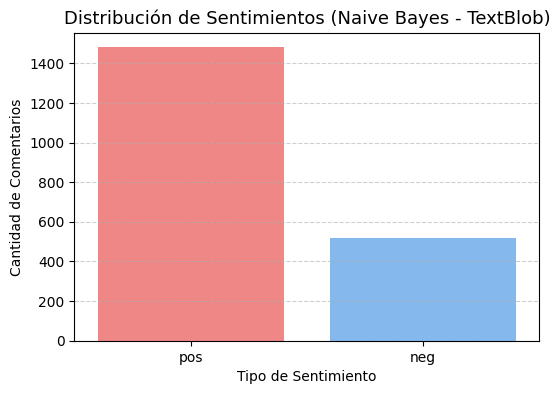

C:\Users\Sharis Barrios\AppData\Local\Temp\ipykernel_26816\4108195572.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tb_nb_p_pos'], label='Probabilidad Positiva', shade=True, color='#55efc4')
C:\Users\Sharis Barrios\AppData\Local\Temp\ipykernel_26816\4108195572.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tb_nb_p_neg'], label='Probabilidad Negativa', shade=True, color='#fab1a0')


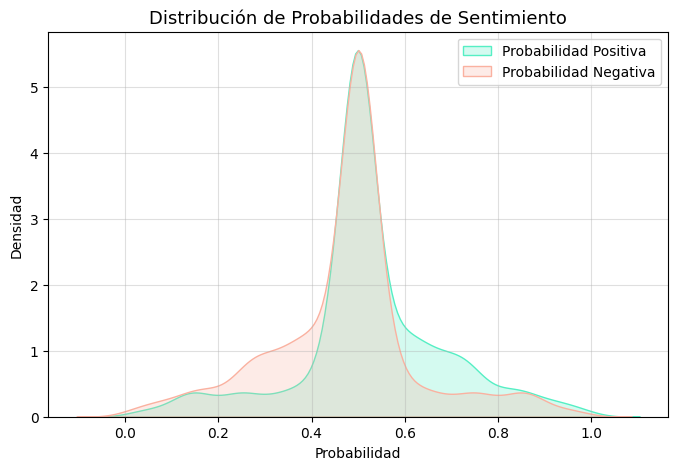

In [29]:
# Análisis de las variables obtenidas

import matplotlib.pyplot as plt
import seaborn as sns

conteo = df['tb_nb_label'].value_counts().reset_index()
conteo.columns = ['Sentimiento', 'Cantidad']

print("Distribución de sentimientos:")
print(conteo)
conteo['Porcentaje (%)'] = round((conteo['Cantidad'] / conteo['Cantidad'].sum()) * 100, 2)
display(conteo)

# Gráfico de barras para sentimientos
plt.figure(figsize=(6,4))
sns.barplot(x='Sentimiento', y='Cantidad', data=conteo, palette=['#ff7675', '#74b9ff'])
plt.title('Distribución de Sentimientos (Naive Bayes - TextBlob)', fontsize=13)
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Gráfico de distribución de probabilidades positivas y negativas
plt.figure(figsize=(8,5))
sns.kdeplot(df['tb_nb_p_pos'], label='Probabilidad Positiva', shade=True, color='#55efc4')
sns.kdeplot(df['tb_nb_p_neg'], label='Probabilidad Negativa', shade=True, color='#fab1a0')
plt.title('Distribución de Probabilidades de Sentimiento', fontsize=13)
plt.xlabel('Probabilidad')
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.4)
plt.show()